## 데이터 과학자 급여
데이터 과학의 임금 여정 차트 작성: 급여 2020-2024

In [2]:
#%conda install wordcloud

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/leejieun/miniforge3/envs/ai

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.9.3            |  py312h98912ed_1         187 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         187 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.9.3-py312h98912ed_1 



                                                                             

In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#FF5733", "#33FFC7", "#FF33A8", "#33A8FF", "#FFCE33",
          "#33FF57", "#FF338E", "#337BFF", "#FF8E33", "#334DFF",
          "#B533FF", "#33FFCE", "#FF3333", "#33FF33", "#FF33FF"]

In [4]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/iamsouravbanerjee/data-science-salaries-2023/v5_Latest_Data_Science_Salaries.csv')

In [5]:
df.sample()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
3259,Data Engineer,Full-Time,Senior,Expert,141300,United States Dollar,United States,141300,United States,Medium,2022


In [6]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023


In [7]:
df.shape

(3951, 11)

In [8]:
df.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3951 non-null   object
 1   Employment Type     3951 non-null   object
 2   Experience Level    3951 non-null   object
 3   Expertise Level     3951 non-null   object
 4   Salary              3951 non-null   int64 
 5   Salary Currency     3951 non-null   object
 6   Company Location    3951 non-null   object
 7   Salary in USD       3951 non-null   int64 
 8   Employee Residence  3951 non-null   object
 9   Company Size        3951 non-null   object
 10  Year                3951 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 339.7+ KB


In [10]:
df.describe()

,Salary,Salary in USD,Year
count,"3,951.00","3,951.00","3,951.00"
mean,"198,290.04","142,753.11","2,022.58"
std,"672,530.97","68,281.39",0.68
min,"14,000.00","15,000.00","2,020.00"
25%,"95,000.00","92,280.00","2,022.00"
50%,"140,000.00","136,600.00","2,023.00"
75%,"189,875.00","185,000.00","2,023.00"
max,"30,400,000.00","450,000.00","2,023.00"


In [11]:
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [12]:
df.isna().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df['Job Title'].nunique()

120

In [18]:
df['Job Title'].value_counts()

Job Title
Data Engineer                      803
Data Scientist                     731
Data Analyst                       542
Machine Learning Engineer          362
Analytics Engineer                 161
                                  ... 
Staff Machine Learning Engineer      1
Data Engineer 2                      1
Deep Learning Researcher             1
Consultant Data Engineer             1
Data DevOps Engineer                 1
Name: count, Length: 120, dtype: int64

In [19]:
top_20_job_title = df['Job Title'].value_counts()[:20]
top_20_job_title

Job Title
Data Engineer                     803
Data Scientist                    731
Data Analyst                      542
Machine Learning Engineer         362
Analytics Engineer                161
Research Scientist                120
Data Architect                     93
Research Engineer                  76
ML Engineer                        74
Data Science Manager               68
Applied Scientist                  61
Machine Learning Scientist         49
Data Manager                       44
Data Science Consultant            33
Business Intelligence Engineer     33
Data Specialist                    25
Data Analytics Manager             23
Director of Data Science           23
Computer Vision Engineer           22
BI Developer                       22
Name: count, dtype: int64

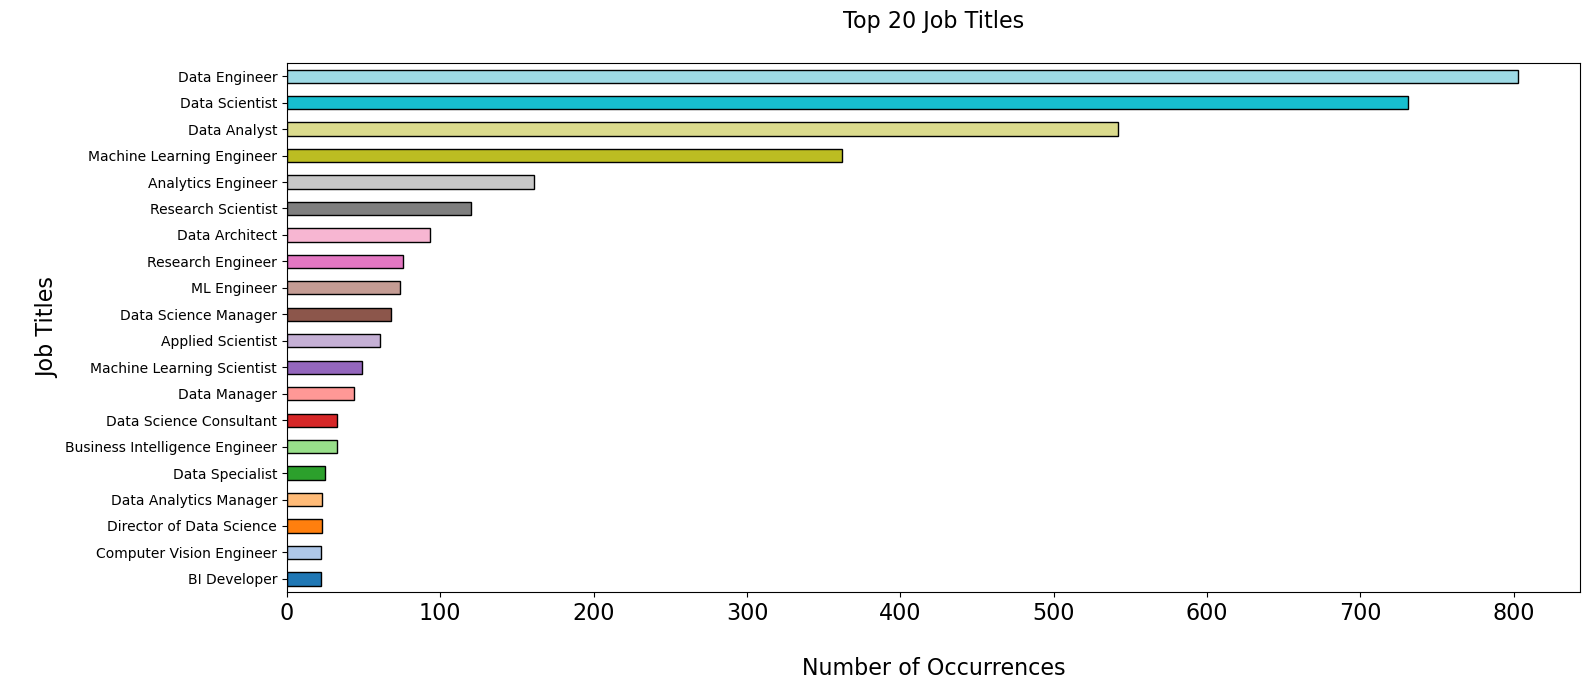

In [24]:
plt.figure(figsize=(16,7))
top_20_job_title.sort_values(ascending=True).plot(kind='barh', color= sns.color_palette('tab20'),edgecolor='black')
plt.ylabel('\nJob Titles', fontsize=16)
plt.xlabel('\nNumber of Occurrences', fontsize=16)
plt.title('Top 20 Job Titles\n', fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.tight_layout()
plt.show()

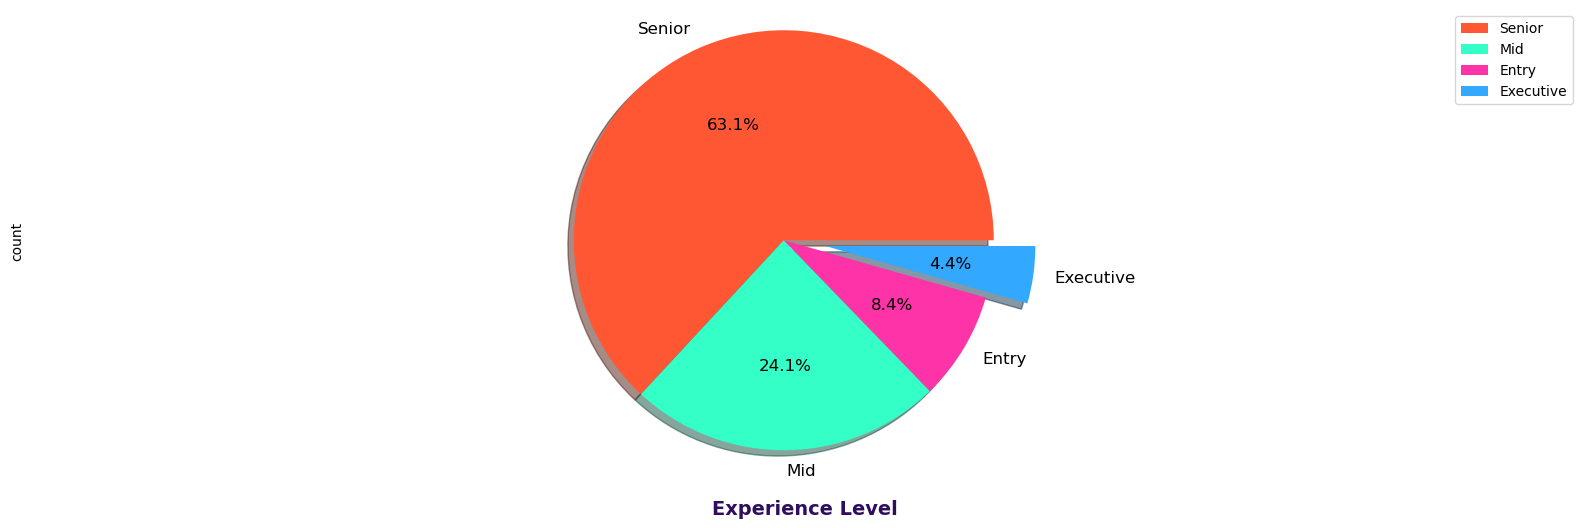

In [38]:
plt.figure(figsize=(20,6))
counts = df['Experience Level'].value_counts()
explode =(0,0,0, 0.2)

counts.plot(kind='pie', fontsize=12, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.xlabel('Experience Level', weight = 'bold', color = '#2F0F5D', fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels= counts.index, loc='best')
plt.show()

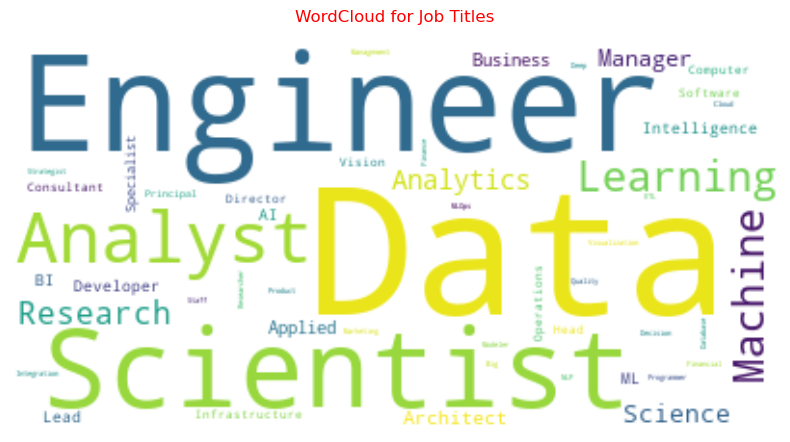

In [37]:
text =' '.join(title for title in df['Job Title'])
word_cloud =WordCloud(collocations= False, background_color='white').generate(text)
plt.figure(figsize=(20, 5))
plt.imshow(word_cloud, interpolation='bilinear') # bilinear: 부드럽게 / none: 그대로
plt.axis('off')
plt.title('WordCloud for Job Titles\n', fontsize=12, color = '#FF0000')
plt.show()

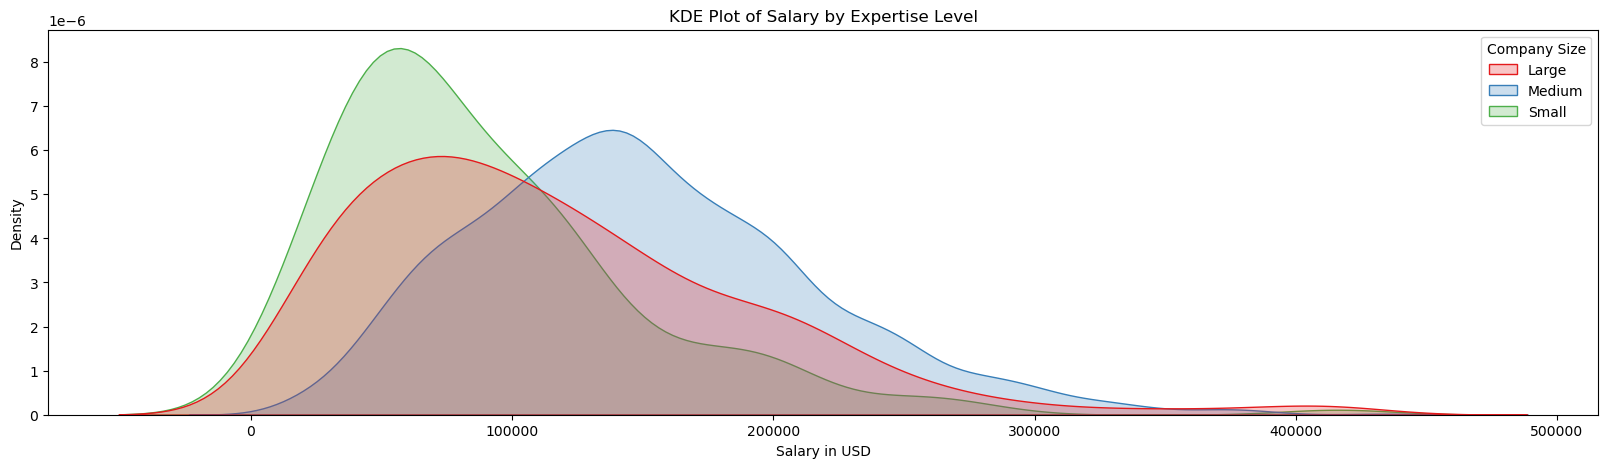

In [33]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x='Salary in USD', hue='Company Size', common_norm=False, fill=True, palette='Set1')
plt.title('KDE Plot of Salary by Expertise Level')
plt.xlabel('Salary in USD')
plt.show()

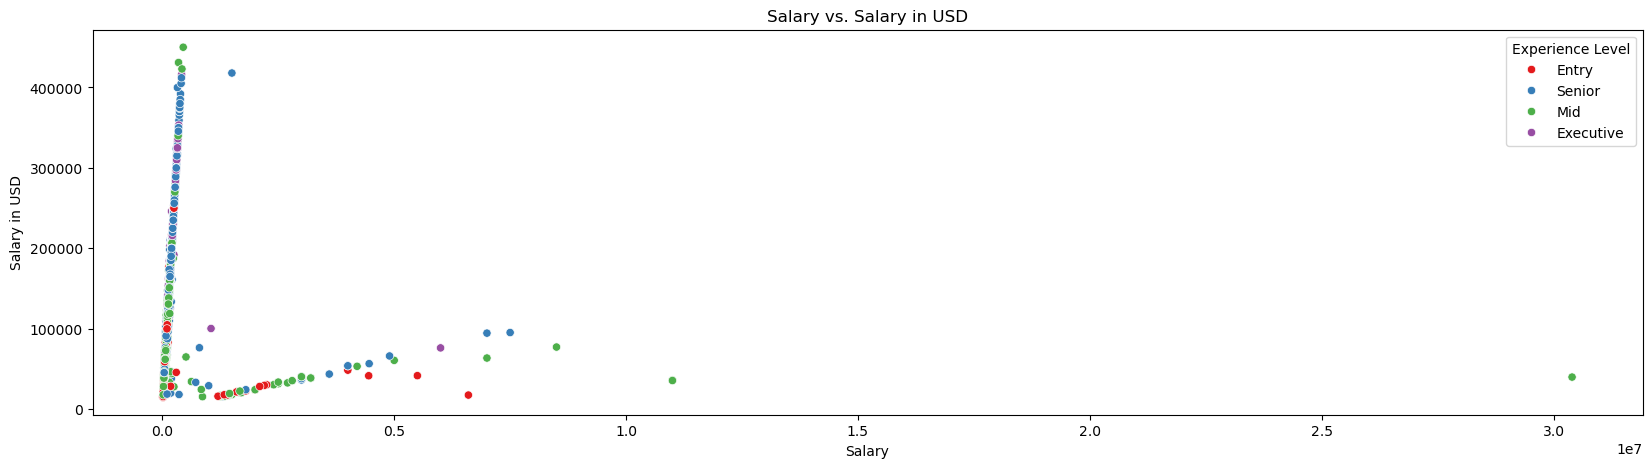

In [35]:
plt.figure(figsize=(20, 5))
sns.scatterplot(data=df, x='Salary', y='Salary in USD', hue='Experience Level', palette='Set1')
plt.title('Salary vs. Salary in USD')
plt.xlabel('Salary')
plt.ylabel('Salary in USD')
plt.show()